In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N_EPOCHS = 1000
train_rmse_list = []
test_rmse_list = []

In [3]:
x = tf.placeholder(tf.float32, [None,3])
w = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.zeros([1]))

In [4]:
def fwdNode(x, w, b):
    Input = tf.add(tf.matmul(x,w), b)
    Output = tf.sigmoid(Input)
    return Output

In [5]:
#Feed
Pred = fwdNode(x, w, b)

In [6]:
L1 = tf.placeholder(tf.float32, [None,3])
Out = tf.placeholder(tf.float32, [None,3])
cost_func = tf.reduce_mean(tf.square(Out - Pred))
#train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost_func)
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost_func)

In [7]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [8]:
X_train = X[:40000]
X_test = X[40000:]
y_train = y[:40000]
y_test = y[40000:]

In [9]:
# Evaluation
rmse_a = tf.placeholder(tf.float32, [None, 3])
rmse_b = tf.placeholder(tf.float32, [None, 3])
rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))

In [10]:
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    
    sess.run(init)
    #print (sess.run(rmse_a))
    for epoch in range(N_EPOCHS):
        #print (epoch + 1)
        sess.run(train_step, feed_dict = {x:X_train, Out:y_train})
        train_pred = sess.run(Pred, feed_dict = {x:X_train})
        train_rmse = sess.run(cost_func, feed_dict={x: X_train, Out:y_train})
        train_rmse_list += [train_rmse]
       # print (sess.run(cost_func, feed_dict ))
        pred = sess.run(Pred, feed_dict = {x:X_test})
        test_rmse = sess.run(cost_func, feed_dict={x: X_test, Out:y_test})
        #print ("\nEpoch : ", (epoch+1), "\nRMSE : ", my_rmse)
        #print (pred)
        #print (sess.run(rmse, feed_dict = {rmse_a:X_test, rmse_b:y_test}))
        test_rmse_list += [test_rmse]

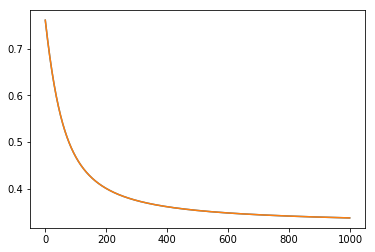

In [12]:
#TRAIN RMSE SIGMOID
plt.plot(list(enumerate(range(len(train_rmse_list)))),train_rmse_list)

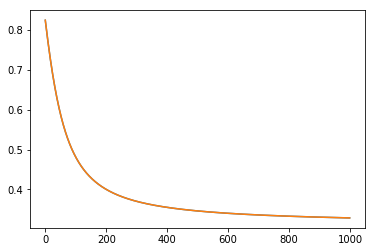

In [13]:
#TEST RMSE SIGMOID
plt.plot(list(enumerate(range(len(test_rmse_list)))),test_rmse_list)
#what

In [14]:
train_rmse_list

[0.7608183,
 0.75501835,
 0.7492966,
 0.74364746,
 0.7380707,
 0.7325696,
 0.72714543,
 0.7217969,
 0.71652406,
 0.7113276,
 0.70620537,
 0.701159,
 0.69618666,
 0.6912928,
 0.6864719,
 0.6817242,
 0.67705196,
 0.67245287,
 0.6679259,
 0.6634743,
 0.65909094,
 0.6547809,
 0.6505401,
 0.64636904,
 0.6422664,
 0.63823307,
 0.63426495,
 0.63036424,
 0.6265297,
 0.6227589,
 0.619054,
 0.6154075,
 0.61182606,
 0.60830456,
 0.6048433,
 0.60144323,
 0.59809655,
 0.59481186,
 0.591581,
 0.58840615,
 0.58528507,
 0.58221865,
 0.5792032,
 0.5762417,
 0.5733297,
 0.57046753,
 0.56765425,
 0.56488854,
 0.562172,
 0.5595003,
 0.5568737,
 0.5542922,
 0.55175364,
 0.54925853,
 0.5468066,
 0.54439366,
 0.54202324,
 0.53969145,
 0.53739923,
 0.5351445,
 0.5329279,
 0.5307465,
 0.5286038,
 0.52649426,
 0.52442044,
 0.5223809,
 0.5203726,
 0.51839864,
 0.51645684,
 0.5145452,
 0.51266617,
 0.51081526,
 0.50899386,
 0.5072029,
 0.50543886,
 0.50370395,
 0.50199676,
 0.50031394,
 0.4986591,
 0.49702835,
 0

In [15]:
test_rmse_list

[0.82410896,
 0.81771535,
 0.8113824,
 0.80511266,
 0.7989083,
 0.7927692,
 0.78669757,
 0.7806923,
 0.77475846,
 0.76889205,
 0.7630973,
 0.7573741,
 0.7517201,
 0.74614054,
 0.74063295,
 0.73519766,
 0.7298354,
 0.72454536,
 0.7193295,
 0.7141853,
 0.7091147,
 0.70411664,
 0.69919074,
 0.6943378,
 0.68955624,
 0.68484694,
 0.6802059,
 0.6756368,
 0.67113745,
 0.6667084,
 0.6623466,
 0.6580536,
 0.6538276,
 0.64966685,
 0.6455734,
 0.64154595,
 0.6375816,
 0.63368106,
 0.62984234,
 0.6260669,
 0.6223523,
 0.6186983,
 0.61510396,
 0.61156636,
 0.6080884,
 0.6046665,
 0.601299,
 0.59798855,
 0.5947317,
 0.5915271,
 0.5883765,
 0.5852777,
 0.58222896,
 0.57923,
 0.57628095,
 0.57337993,
 0.570527,
 0.5677182,
 0.5649578,
 0.56224006,
 0.5595684,
 0.5569389,
 0.55435276,
 0.55180854,
 0.5493041,
 0.5468423,
 0.54441875,
 0.5420348,
 0.5396878,
 0.5373783,
 0.53510606,
 0.5328705,
 0.5306688,
 0.5285031,
 0.5263715,
 0.5242725,
 0.52220744,
 0.5201738,
 0.5181724,
 0.5162014,
 0.51426125,
